In [97]:
import os, random, seaborn as sb
import numpy as np, matplotlib.pyplot as plt
import pandas as pd, itertools
from sklearn.metrics import confusion_matrix

## Read the dataset  files

#### Working with Bible related Data

In [98]:
colab_path = "C:/Users/yadik/Desktop/final_code/data"
# colab_path = "C:/Users/USER/OneDrive - ort braude college of engineering/Desktop/data"
data_base_name = "data_base_Bible"

<p>Reads all the files from the directory and subdirectories, extracts the file's contents and their corresponding labels, and appends them to <span style='color:blue;'>data_txts</span> and <span style='color:blue;'>data_labels</span>, respectively.</p>

In [99]:
data_txts = []
data_labels = []

for root, ds, fs in os.walk(os.path.join(colab_path, data_base_name)):
    for file in fs:
        if root.split(os.path.sep)[-1] != data_base_name:
            label = root.split(os.path.sep)[-1]
            print("+", root, "= Label:", label)
            with open(os.path.join(root, file), 'r', encoding = "utf-8") as txtfile:
                txt = txtfile.read()
                data_txts.append(txt)
                if root.split(os.path.sep)[-2].lower() == "bible":
                    data_labels.append(f"bible_{label}")  
                else:
                    data_labels.append(label)

+ C:/Users/yadik/Desktop/final_code/data\data_base_Bible\Bible\אנשי הכנסת הגדולה = Label: אנשי הכנסת הגדולה
+ C:/Users/yadik/Desktop/final_code/data\data_base_Bible\Bible\אנשי הכנסת הגדולה = Label: אנשי הכנסת הגדולה
+ C:/Users/yadik/Desktop/final_code/data\data_base_Bible\Bible\אנשי הכנסת הגדולה = Label: אנשי הכנסת הגדולה
+ C:/Users/yadik/Desktop/final_code/data\data_base_Bible\Bible\דוד = Label: דוד
+ C:/Users/yadik/Desktop/final_code/data\data_base_Bible\Bible\הושע = Label: הושע
+ C:/Users/yadik/Desktop/final_code/data\data_base_Bible\Bible\זכריה = Label: זכריה
+ C:/Users/yadik/Desktop/final_code/data\data_base_Bible\Bible\חבקוק = Label: חבקוק
+ C:/Users/yadik/Desktop/final_code/data\data_base_Bible\Bible\חגיי = Label: חגיי
+ C:/Users/yadik/Desktop/final_code/data\data_base_Bible\Bible\חזקיה = Label: חזקיה
+ C:/Users/yadik/Desktop/final_code/data\data_base_Bible\Bible\חזקיה = Label: חזקיה
+ C:/Users/yadik/Desktop/final_code/data\data_base_Bible\Bible\חזקיה = Label: חזקיה
+ C:/Users/y

In [100]:
# Show labels
np.unique(data_labels)

array(['bible_אנשי הכנסת הגדולה', 'bible_דוד', 'bible_הושע',
       'bible_זכריה', 'bible_חבקוק', 'bible_חגיי', 'bible_חזקיה',
       'bible_יהושוע', 'bible_יואל', 'bible_יונה', 'bible_ירמיה',
       'bible_מיכה', 'bible_מלאכי', 'bible_משה', 'bible_נחום',
       'bible_עובדיה', 'bible_עזרא', 'bible_עמוס', 'bible_שמואל',
       'דוד פרישמן', 'הורביץ, חיים מאיר', 'ויקיפדיה', 'זאב יעבץ',
       'חיים נחמן ביאליק', 'יהודה שטיינברג', 'יצחק ארטר', 'יצחק יציב',
       'ישראל בן מאיר בלקינד', 'ישראל בנימין לבנר', 'ישראל זמורה',
       'מנחם שטיין', 'מתתיה דלקרוט', 'נחום סוקולוב', 'קנוט האמסון',
       'קרל אולד', "ר' בנימין", 'ר_ בנימין', 'שלום רוזנפלד',
       'שמואל ואקנין', 'שמעון הלקין'], dtype='<U23')

In [101]:
df0 = pd.DataFrame({
                     "txt": data_txts,
                     "label": data_labels
                   })
df0

,txt,label
0,"﻿אסתר\nא,א וַיְהִי, בִּימֵי אֲחַשְׁוֵרוֹשׁ: ה...",bible_אנשי הכנסת הגדולה
1,"﻿דנייאל\nא,א בִּשְׁנַת שָׁלוֹשׁ, לְמַלְכוּת יְ...",bible_אנשי הכנסת הגדולה
2,"﻿יחזקאל\nא,א וַיְהִי בִּשְׁלֹשִׁים שָׁנָה, בָּ...",bible_אנשי הכנסת הגדולה
3,"﻿תהילים\n\nיח,א לַמְנַצֵּחַ, לְעֶבֶד יְהוָה--...",bible_דוד
4,"﻿הושע\nא,א דְּבַר-יְהוָה אֲשֶׁר הָיָה, אֶל-הוֹ...",bible_הושע
...,...,...
91,﻿\n\n\nההשחתה של אבימבולה סאלאקו\n\n\nכשנכנסתי...,שמואל ואקנין
92,[1]\nבספרות כתיקונה ובחיי־עם שלמים ומתוקנים וד...,שמעון הלקין
93,"[א]\nכשנכנס לוסקין אל חדר עבודתו, מצא את מקורמ...",שמעון הלקין
94,"[א]\nבשלוש לפנות־בוקר, כשעה לאחר שכיבה, ניעור ...",שמעון הלקין


# Process the data

<p>On the first time of running uncomment, this cell</p>

In [102]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [103]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download('punkt')
import string
import numpy as np
import gc
from transformers import AutoTokenizer
from sklearn.preprocessing import LabelEncoder

def preprocessing_stage(text):
    try:
        # Split into words
        tokens = word_tokenize(text)
        # Convert to lowercase
        tokens = [w.lower() for w in tokens]
        # Remove punctuation from each word
        hebrew_punctuation = '־ְֱֲֳִֵֶַָֹֻּׂ׀'
        all_punctuation = string.punctuation + hebrew_punctuation
        table = str.maketrans('', '', all_punctuation) 
        stripped = [w.translate(table) for w in tokens]
        # Remove remaining tokens that are not alphabetic
        words = [word for word in stripped if word.isalpha()]
        # Filter out stop words
        stop_words = set(stopwords.words('hebrew'))
        words = [w for w in words if not w in stop_words]
        # Elemintate the Nan Values
        words = [x for x in words if str(x) != 'nan']
        words = [x for x in words if str(x) != '']
        words = " ".join(words)
        return words
    except Exception as e:
        print("ERROR in preprocessing_stage: " + e.args[0])
        return None

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yadik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yadik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### hebBert_algorithm

In [104]:
from transformers import AutoTokenizer, AutoModel, pipeline, BertForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained("avichr/heBERT")
def hebBert_algorithm(txt, tokenizer):
    try:
        wv = tokenizer(txt, return_tensors = 'np', padding = True)
        return wv["input_ids"]
    except Exception as e:
        print("ERROR in HebBert_algorithm: " + e.args[0])

In [105]:
preprocessed_sentences = []
labels = []
wv_sentences_tmp = []
for txt,label in zip(df0.txt,df0.label):
    sentences = txt.split("\n")
    sentences = [x for x in sentences if str(x) != '']
    for sentence in sentences:
        processed_text = preprocessing_stage(sentence)
        if processed_text != '':
            # print("+", phrase, "--", processed_text)
            preprocessed_sentences.append(processed_text)
            wv = hebBert_algorithm(preprocessed_sentences[-1], tokenizer)
            wv_sentences_tmp.append(wv)
            labels.append(label)

#### Add padding to WV so that they have the same size

In [106]:
emb_dim = 300
print(f"The max size of Wv is {emb_dim}")
wv_sentences = []
for wv in wv_sentences_tmp:
    wv = np.pad(wv.reshape(-1), (0, emb_dim), 'constant')
    wv_sentences.append(wv[:emb_dim])

The max size of Wv is 300


In [107]:
print(len(labels))
print(len(preprocessed_sentences))
print(len(wv_sentences))

25846
25846
25846


In [108]:
df_wv = pd.DataFrame({
                        "txt": preprocessed_sentences,
                        "wv": wv_sentences,
                        "label": labels
                     })
df_wv

,txt,wv,label
0,א א ויהי בימי המלך מהדו ועשרים ומאה מדינה א ב ...,"[2, 197, 197, 9847, 5403, 4131, 5081, 1008, 29...",bible_אנשי הכנסת הגדולה
1,ס ט ז ר,"[2, 214, 205, 203, 221, 3, 0, 0, 0, 0, 0, 0, 0...",bible_אנשי הכנסת הגדולה
2,ס ר,"[2, 214, 221, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",bible_אנשי הכנסת הגדולה
3,דלפון ס ר,"[2, 5879, 2257, 214, 221, 3, 0, 0, 0, 0, 0, 0,...",bible_אנשי הכנסת הגדולה
4,אספתא ס ט ח ר,"[2, 2163, 1713, 1017, 214, 205, 204, 221, 3, 0...",bible_אנשי הכנסת הגדולה
...,...,...,...
25841,עיןהיירקון לפניה כאילו שב לחיות לאורהעששית האד...,"[2, 3983, 1013, 9627, 11300, 22874, 3863, 1628...",שמעון הלקין
25842,זאריב הרגיש בשקר שבווידויו והרי יודעת וצר מאוד...,"[2, 16874, 6158, 14223, 13853, 1011, 2503, 776...",שמעון הלקין
25843,תסלחי יכולתי לעצור הלא קרובה קרובה ואם אמנם הג...,"[2, 4179, 1818, 1012, 10634, 7375, 2672, 13226...",שמעון הלקין
25844,כנראה טעתה בכוונת דבריו במטרת ביקורו המוזר עינ...,"[2, 3757, 2466, 1916, 21897, 7571, 5708, 1623,...",שמעון הלקין


In [109]:
df_wv.groupby('label').count().index

Index(['bible_אנשי הכנסת הגדולה', 'bible_דוד', 'bible_הושע', 'bible_זכריה',
       'bible_חבקוק', 'bible_חגיי', 'bible_חזקיה', 'bible_יהושוע',
       'bible_יואל', 'bible_יונה', 'bible_ירמיה', 'bible_מיכה', 'bible_מלאכי',
       'bible_משה', 'bible_נחום', 'bible_עובדיה', 'bible_עזרא', 'bible_עמוס',
       'bible_שמואל', 'דוד פרישמן', 'הורביץ, חיים מאיר', 'ויקיפדיה',
       'זאב יעבץ', 'חיים נחמן ביאליק', 'יהודה שטיינברג', 'יצחק ארטר',
       'יצחק יציב', 'ישראל בן מאיר בלקינד', 'ישראל בנימין לבנר', 'ישראל זמורה',
       'מנחם שטיין', 'מתתיה דלקרוט', 'נחום סוקולוב', 'קנוט האמסון', 'קרל אולד',
       'ר' בנימין', 'ר_ בנימין', 'שלום רוזנפלד', 'שמואל ואקנין',
       'שמעון הלקין'],
      dtype='object', name='label')

The minimum number of samples is 6
The maximum number of samples is 5331


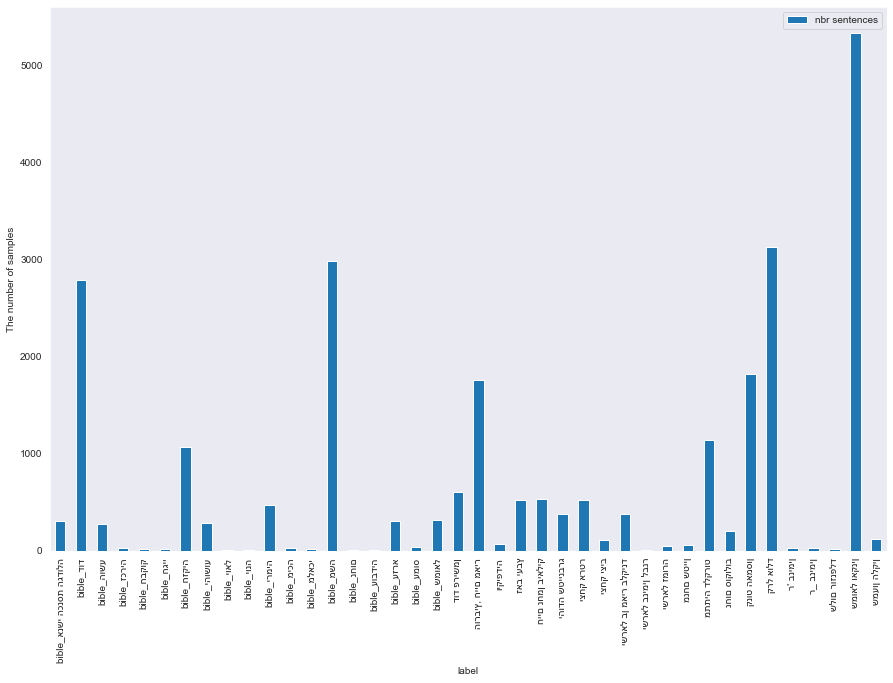

In [110]:
df_wv.groupby("label").count()['txt'].plot(kind = "bar", figsize=(15, 10), label = "nbr sentences")
plt.legend()
plt.ylabel("The number of samples")
print(f"The minimum number of samples is {df_wv.groupby('label').count()['txt'].min()}")
print(f"The maximum number of samples is {df_wv.groupby('label').count()['txt'].max()}")

### Initialize  the Threshold

**Each label has a text which has several sentences. The number of sentences on some labels is very low, so we ignore them using a threshold to get more representative data.**

In [111]:
threshold = 250
list_dataset = [(i, l) for i, l in zip(df_wv.groupby('label').count()['txt'], df_wv.groupby('label').count().index) if i > threshold]
print("The number of labels on which we will train the model is: ", len(list_dataset))
for i, l in list_dataset:
    print(f"\t- label {l} ------> has {i} samples")

USED_LABELS = [l for _, l in list_dataset]

MIN_SAMPLES = min([i for i, _ in list_dataset])

print(f"\nAfter the data balancing each label will have {MIN_SAMPLES}")

The number of labels on which we will train the model is:  20
	- label bible_אנשי הכנסת הגדולה ------> has 311 samples
	- label bible_דוד ------> has 2791 samples
	- label bible_הושע ------> has 280 samples
	- label bible_חזקיה ------> has 1068 samples
	- label bible_יהושוע ------> has 290 samples
	- label bible_ירמיה ------> has 476 samples
	- label bible_משה ------> has 2988 samples
	- label bible_עזרא ------> has 307 samples
	- label bible_שמואל ------> has 321 samples
	- label דוד פרישמן ------> has 606 samples
	- label הורביץ, חיים מאיר ------> has 1760 samples
	- label זאב יעבץ ------> has 525 samples
	- label חיים נחמן ביאליק ------> has 538 samples
	- label יהודה שטיינברג ------> has 376 samples
	- label יצחק ארטר ------> has 522 samples
	- label ישראל בן מאיר בלקינד ------> has 382 samples
	- label מתתיה דלקרוט ------> has 1143 samples
	- label קנוט האמסון ------> has 1820 samples
	- label קרל אולד ------> has 3126 samples
	- label שמואל ואקנין ------> has 5331 samples

After 

## Data Balancing (Balance the Classes)

In [112]:
print(f"The total samples of USED_Labels before Data balancing {sum([i for i, _ in list_dataset])}")

The total samples of USED_Labels before Data balancing 24961


In [113]:
new_df = df_wv[df_wv.label.apply(lambda x: True if x in USED_LABELS else False)].copy()
new_df

,txt,wv,label
0,א א ויהי בימי המלך מהדו ועשרים ומאה מדינה א ב ...,"[2, 197, 197, 9847, 5403, 4131, 5081, 1008, 29...",bible_אנשי הכנסת הגדולה
1,ס ט ז ר,"[2, 214, 205, 203, 221, 3, 0, 0, 0, 0, 0, 0, 0...",bible_אנשי הכנסת הגדולה
2,ס ר,"[2, 214, 221, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",bible_אנשי הכנסת הגדולה
3,דלפון ס ר,"[2, 5879, 2257, 214, 221, 3, 0, 0, 0, 0, 0, 0,...",bible_אנשי הכנסת הגדולה
4,אספתא ס ט ח ר,"[2, 2163, 1713, 1017, 214, 205, 204, 221, 3, 0...",bible_אנשי הכנסת הגדולה
...,...,...,...
25716,בטלוויזיה משהו,"[2, 10511, 2686, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",שמואל ואקנין
25717,כשהדלת נפתחת הראשון המסלול המזוודות בדרך למטוס,"[2, 2356, 3519, 1019, 22650, 2289, 8018, 19750...",שמואל ואקנין
25718,האירופלוט המתפורר הרחק החיים הבאים בעיר אנשים,"[2, 3955, 4506, 1643, 1994, 2009, 1011, 14886,...",שמואל ואקנין
25719,הבן גידי הגיע מהארץ והוא יטפל בענינים ולהבא,"[2, 7322, 12361, 1012, 2688, 14613, 2441, 7381...",שמואל ואקנין


### data balancing
**We will take MIN_SAMPLES(280) in each label**

In [114]:
balanced_df = pd.DataFrame()
for label in USED_LABELS:
    balanced_df = balanced_df.append(new_df[new_df.label == label].sample(MIN_SAMPLES))
    
balanced_df.reset_index(inplace = True, drop = True)
balanced_df

,txt,wv,label
0,כא א ויהי דבריהוה אלי לאמר כא ב בןאדם שים פניך...,"[2, 1711, 197, 9847, 29603, 1715, 2026, 10805,...",bible_אנשי הכנסת הגדולה
1,ז ה כה אמר אדני יהוה רעה אחת רעה באה ז ו קץ בא...,"[2, 203, 201, 2239, 2243, 16899, 4750, 10038, ...",bible_אנשי הכנסת הגדולה
2,לב א ויהי עשרה באחד דבריהוה אלי לאמר לב ב בןאד...,"[2, 1615, 197, 9847, 4968, 5659, 29603, 1715, ...",bible_אנשי הכנסת הגדולה
3,א ויהי באחת עשרה באחד דבריהוה אלי לאמר ב בןאדם...,"[2, 197, 9847, 8104, 4968, 5659, 29603, 1715, ...",bible_אנשי הכנסת הגדולה
4,יג יז ואתה בןאדם שים פניך אלבנות עמך המתנבאות ...,"[2, 3651, 3923, 7926, 2044, 7741, 1046, 17136,...",bible_אנשי הכנסת הגדולה
...,...,...,...
5595,כעבור דקות ספורות הגיע מכונית משטרה וממנה ירדו...,"[2, 8587, 3092, 16503, 2688, 11042, 11690, 277...",שמואל ואקנין
5596,פגישה גידי כדי שאנסה להסדיר מבטיח לנסות השופט,"[2, 11289, 12361, 1012, 1819, 1627, 2714, 2217...",שמואל ואקנין
5597,בוא,"[2, 7899, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",שמואל ואקנין
5598,ביממת מסחר אחת גבם העדים הפער הזה הציק לך בעינ...,"[2, 5806, 1644, 6378, 2091, 1998, 1046, 22929,...",שמואל ואקנין


The total samples of USED_Labels before Data balancing is 5600
The minimum number of samples is 280
The maximum number of samples is 280


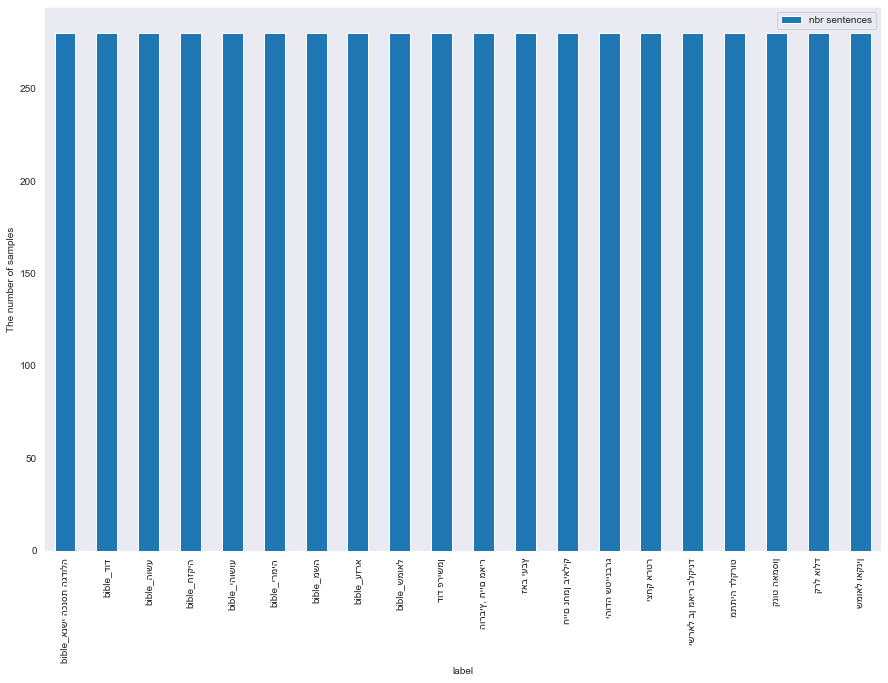

In [115]:
print(f"The total samples of USED_Labels before Data balancing is {len(balanced_df)}")

balanced_df.groupby("label").count()['txt'].plot(kind = "bar", figsize = (15, 10), label = "nbr sentences")
plt.legend()
plt.ylabel("The number of samples")
print(f"The minimum number of samples is {balanced_df.groupby('label').count()['txt'].min()}")
print(f"The maximum number of samples is {balanced_df.groupby('label').count()['txt'].max()}")

### Label encoding

In [116]:
from sklearn.preprocessing import MultiLabelBinarizer

one_hot = MultiLabelBinarizer()
print(one_hot.fit_transform(np.array(balanced_df.label).reshape(-1, 1)))
print(one_hot.classes_)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
['bible_אנשי הכנסת הגדולה' 'bible_דוד' 'bible_הושע' 'bible_חזקיה'
 'bible_יהושוע' 'bible_ירמיה' 'bible_משה' 'bible_עזרא' 'bible_שמואל'
 'דוד פרישמן' 'הורביץ, חיים מאיר' 'זאב יעבץ' 'חיים נחמן ביאליק'
 'יהודה שטיינברג' 'יצחק ארטר' 'ישראל בן מאיר בלקינד' 'מתתיה דלקרוט'
 'קנוט האמסון' 'קרל אולד' 'שמואל ואקנין']


#### Applay the transformation

In [117]:
balanced_df["encoded_label"] = balanced_df.label.apply(lambda x: list(one_hot.transform([[x]])[-1]))
balanced_df.sort_values(by = "label", inplace = True)
balanced_df

,txt,wv,label,encoded_label
0,כא א ויהי דבריהוה אלי לאמר כא ב בןאדם שים פניך...,"[2, 1711, 197, 9847, 29603, 1715, 2026, 10805,...",bible_אנשי הכנסת הגדולה,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
177,כד ט כה אמר אדני יהוה אוי עיר הדמים גםאני אגדי...,"[2, 2232, 205, 2239, 2243, 16899, 4750, 15330,...",bible_אנשי הכנסת הגדולה,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
178,יג א ויהי דבריהוה אלי לאמר יג ב בןאדם הנבא אלנ...,"[2, 3651, 197, 9847, 29603, 1715, 2026, 10805,...",bible_אנשי הכנסת הגדולה,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
179,מח א ואלה מקצה צפונה אליד דרךחתלן לבואחמת חצר ...,"[2, 1573, 197, 10969, 20677, 16485, 2026, 1045...",bible_אנשי הכנסת הגדולה,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
180,לג א ויהי דבריהוה אלי לאמר לג ב בןאדם דבר אלבנ...,"[2, 1758, 197, 9847, 29603, 1715, 2026, 10805,...",bible_אנשי הכנסת הגדולה,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
5410,ושאלה לחזור ולא אמרה,"[2, 17018, 1013, 4410, 1801, 5220, 3, 0, 0, 0,...",שמואל ואקנין,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5409,לניאדו נעלם משקפי השמש ונעץ מבט שחור באבימבולה,"[2, 4051, 7741, 1008, 12984, 22367, 5846, 5756...",שמואל ואקנין,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5408,לקחתי בחשבון שלא ניפרד לעולם מגיב בשקט,"[2, 16462, 5476, 1851, 24402, 2428, 3635, 1904...",שמואל ואקנין,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5414,חשיבה וכוח הרצון ולהלחם בכאב המעוות הזה שהוא ה...,"[2, 8707, 22452, 7472, 2002, 9731, 22819, 1957...",שמואל ואקנין,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


## create X, Y

In [118]:
list_wv_txt = []
Y_tmp0 = []
for token, _label in zip(balanced_df.wv, balanced_df.encoded_label):
    list_wv_txt.append(token.reshape(-1).tolist())
    Y_tmp0.append(_label)  
print(np.shape(Y_tmp0)) 

(5600, 20)


In [119]:
batch_factor = 2
chunk_size = 20  # The number of Word vectors/sentences

data_batch_size = chunk_size // batch_factor
print(f"The data_batch_size is: {data_batch_size}")

list_wv_txt = np.asarray(list_wv_txt)
bloks = len(list_wv_txt) // data_batch_size
print(f"The number of Blocks is: {bloks}")

X_1 = []
Y_tmp1 = []
for kk in range(bloks):
    X_1.append(list_wv_txt[kk * data_batch_size: (kk + 1) * data_batch_size])
    Y_tmp1.append(Y_tmp0[kk * data_batch_size: (kk + 1) * data_batch_size])

The data_batch_size is: 10
The number of Blocks is: 560


In [120]:
Xs = []
Y_tmp2 = []
indices = [i for i, y in enumerate(Y_tmp1) if len(np.unique([str(j) for j in y])) > 1]
indices
for ii in range(len(X_1)):
    if ii not in indices:
        Xs.append(X_1[ii])
        Y_tmp2.append(Y_tmp1[ii][-1])
Xs = np.asarray(Xs)
Y = np.array(Y_tmp2, dtype = np.float32)
print("X", np.shape(Xs))
print("Y", np.shape(Y))

X (560, 10, 300)
Y (560, 20)


####  Standardizing the data 

In [121]:
from sklearn.preprocessing import StandardScaler
# standardize dataset
std_scaler = StandardScaler()
X = std_scaler.fit_transform(Xs.reshape(-1, 1))
X = X.reshape(np.shape(Xs))

###  Split the data 

In [122]:
import numpy as np
from sklearn.model_selection import train_test_split

test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = test_size, random_state = 121, shuffle = True)

print("Train:")
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("Test:")
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train_duplicated = np.concatenate((x_train, x_train))
y_train_duplicated = np.concatenate((y_train, y_train))

x_test_duplicated = np.concatenate((x_train, x_test))
y_test_duplicated = np.concatenate((y_train, y_test))
x_test_duplicated = np.concatenate((x_test_duplicated, x_test_duplicated))
y_test_duplicated = np.concatenate((y_test_duplicated, y_test_duplicated))

print("Duplicated Train:")
print("x_train", x_train_duplicated.shape)
print("y_train", y_train_duplicated.shape)
print("Duplicated Test:")
print("x_test", x_test_duplicated.shape)
print("y_test", y_test_duplicated.shape)

Train:
x_train (448, 10, 300)
y_train (448, 20)
Test:
x_test (112, 10, 300)
y_test (112, 20)
Duplicated Train:
x_train (896, 10, 300)
y_train (896, 20)
Duplicated Test:
x_test (1120, 10, 300)
y_test (1120, 20)


## Create the model

In [123]:
import numpy as np
import keras
from keras import Sequential
from keras import backend as K
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, LeakyReLU, Layer
from keras.layers.convolutional import MaxPooling1D, Conv1D
from keras.callbacks import EarlyStopping
import tensorflow as tf
import gc
import matplotlib.pyplot as plt

global model, word_model

def cnn(X, Y):
    num_classes = 2

    print('Data:')
    print("X data", X.shape)
    print("Y data", Y.shape)
    
    X_train, Y_train = X, Y
    
    # Creating the model
    model = Sequential()
    model.add(Conv1D(filters = 1000, kernel_size = 3, padding = 'valid', activation = 'relu', input_shape = (data_batch_size, emb_dim)))
    model.add(MaxPooling1D(pool_size = 1))
    model.add(Dropout(0.3))
    model.add(Conv1D(filters = 1000, kernel_size = 4, padding = 'valid', activation = 'relu', input_shape = (data_batch_size, emb_dim)))
    model.add(MaxPooling1D(pool_size = 1))
    model.add(Dropout(0.3))
    model.add(Conv1D(filters = 1000, kernel_size = 5, padding = 'valid', activation = 'relu', input_shape = (data_batch_size, emb_dim)))
    model.add(MaxPooling1D(pool_size = 1))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(128, activation = 'linear'))
    model.add(Dense(20, activation = 'softmax'))
    model.summary()
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

    print('Fit the model...')

    history = model.fit(x_train_duplicated, y_train_duplicated, validation_split = test_size, epochs = 12, verbose = 1)
    del X, Y

    gc.collect()

    return model, history

In [124]:
cnn_model, history = cnn(x_train_duplicated, y_train_duplicated)

Data:
X data (896, 10, 300)
Y data (896, 20)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 8, 1000)           901000    
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 8, 1000)          0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 8, 1000)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 5, 1000)           4001000   
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 5, 1000)          0         
 1D)                                                             
                                                                 
 dropout_

## Evaluate the model

In [125]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    plt.figure(figsize = (20, 10))
    plt.subplot(1, 2, 1)
    plt.suptitle('Optimizer: Adam', fontsize = 16)
    plt.ylabel('Loss', fontsize = 16)
    plt.plot(history.history['loss'], label = 'Training Loss')
    plt.plot(history.history['val_loss'], label = 'Validation Loss')
    plt.legend(loc = 'upper right')
    plt.subplot(1, 2, 2)
    plt.ylabel('Accuracy', fontsize = 16)
    plt.plot(history.history['accuracy'], label = 'Training Accuracy')
    plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
    plt.legend(loc = 'lower right')
    plt.show()

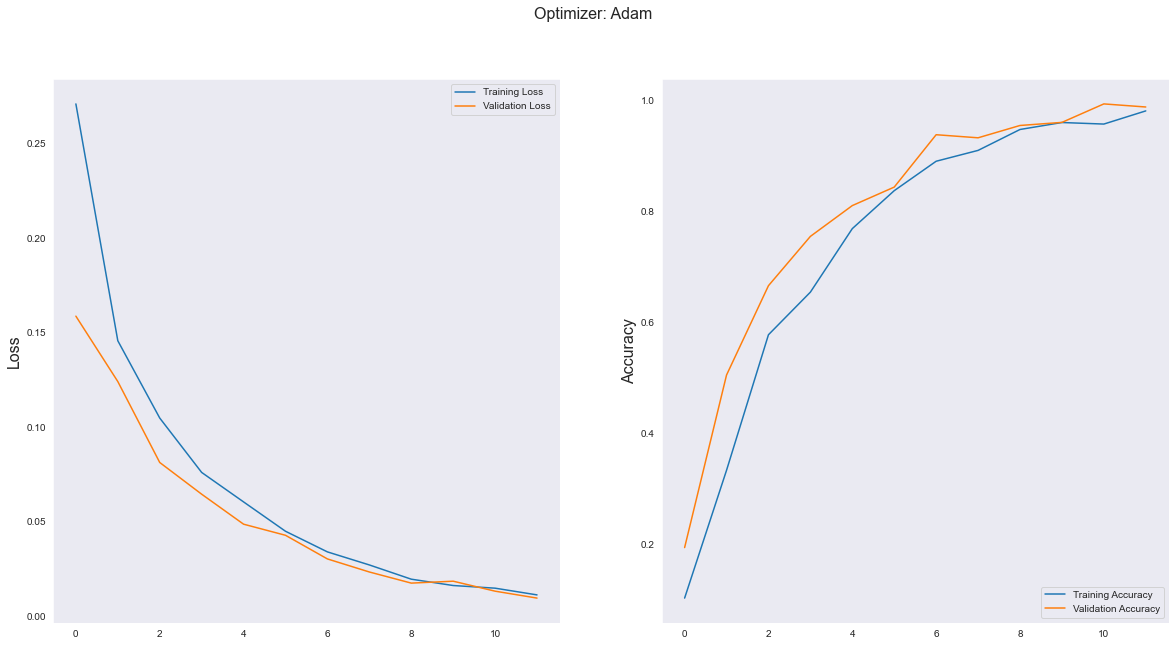

In [126]:
plot_accuracy_and_loss(history)

In [127]:
cnn_model.evaluate(x_test_duplicated, y_test_duplicated)

35/35 [==============================] - 1s 31ms/step - loss: 0.0575 - accuracy: 0.8518


[0.057476308196783066, 0.8517857193946838]

In [128]:
# Prediction
y_pred = cnn_model.predict(x_test_duplicated)

35/35 [==============================] - 2s 38ms/step


**plot_confusion_matrix**: creates a visual representation of the confusion matrix 

In [129]:
def plot_confusion_matrix(ytest, ypred, classes, title = 'Confusion matrix', cmap = plt.cm.Blues):
    cnf_matrix = confusion_matrix(ytest, ypred)
    cm = cnf_matrix
    np.set_printoptions(precision = 2)    
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center", size = "x-large",
                 color = "white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    sb.set_style("dark")
    plt.figure()
    plt.show()  

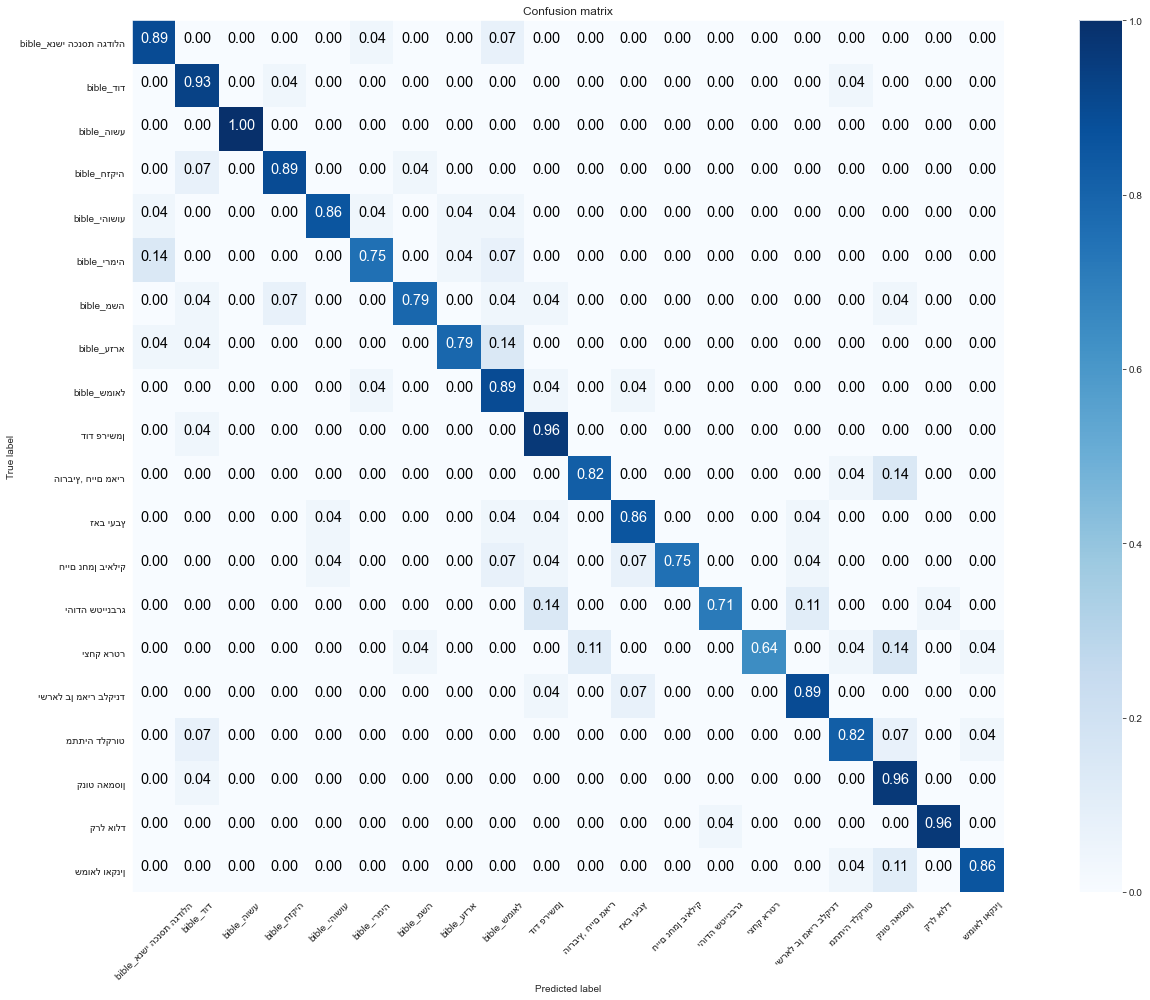

<Figure size 432x288 with 0 Axes>

In [154]:
plt.figure(figsize = (21, 14))
plot_confusion_matrix(y_test_duplicated.argmax(axis = 1), y_pred.argmax(axis = 1), USED_LABELS, title = 'Confusion matrix', cmap = plt.cm.Blues)

## Get predictions

### Load text

In [131]:
txt_to_classify_file = os.path.join(colab_path, data_base_name, "text to classify.txt")
with open(txt_to_classify_file, "r", encoding="utf-8") as txt_file:
    txt_to_classify = txt_file.read()

### Split the text into sentences and get tokens (WV)

In [132]:
phrases = txt_to_classify.split("\n")
phrases = [x for x in phrases if str(x) != '']
wvs__ = []
for phrase in phrases:
    processed_text = preprocessing_stage(phrase)
    processed_text = [x for x in processed_text if str(x) != '']
    if len(processed_text) > 1:
        wv = hebBert_algorithm(processed_text, tokenizer)
        wv = np.pad(wv.reshape(-1), (0, emb_dim), 'constant')[:emb_dim]
        wvs__.append(wv)

### Format the WV into (blocks, batch_size, emb_dim)

In [133]:
X___1 = []
for kk in range(len(wvs__) // data_batch_size):
    X___1.append(wvs__[kk * data_batch_size: (kk + 1) * data_batch_size])
X___1 = np.array(X___1)
print(X___1.shape)

(22, 10, 300)


#### Scale the WV

In [134]:
X__ = std_scaler.transform(X___1.reshape(-1, 1))
X__ = X__.reshape(np.shape(X___1))

#### Prediction

In [135]:
prediction = cnn_model.predict(X__)
prediction__ = []
for i in prediction:
    prediction__.append([1 if j >= 0.5 else 0 for j in i])

# Get the class Using a voting technique 
voting_map = {}
for i in one_hot.inverse_transform(np.array(prediction__)):
    for j in one_hot.inverse_transform(np.array(prediction__)):
        if i == j:
            if i in voting_map.keys():
                voting_map[i] += 1
            else:
                voting_map[i] = 1

# Get the final classification for the text
res = str([classe for i, classe in enumerate(voting_map.keys()) if i == np.argmax(list(voting_map.values()))][0])
print(f"This text is classed as {res[2: -3]}")

1/1 [==============================] - 0s 200ms/step
This text is classed as bible_דוד
